In [3]:
import pandas as pd
import xml.etree.ElementTree as ET
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
counts_list=[]
for i in range(5):
    tree = ET.parse('Sim{}/Sim{}_25MIV_tripInfo.xml'.format(i+1,i+1))
    root = tree.getroot()

    
    for tripinfo in root.findall(".//tripinfo"):
        counts_dict = {}
        counts_dict['veh_id'] = tripinfo.get('id')+'_{}'.format(i+1)
        counts_dict['vType'] = tripinfo.get('vType')
        #counts_dict['departLane'] = tripinfo.get('departLane')
        #counts_dict['arrivalLane'] = tripinfo.get('arrivalLane')
        counts_dict['departDelay'] = tripinfo.get('departDelay', np.nan)
        counts_dict['traveltime'] = tripinfo.get('duration',np.nan)
        counts_dict['delay'] = tripinfo.get('timeLoss',np.nan)
        counts_dict['routeLength'] = tripinfo.get('routeLength',np.nan)
        counts_dict['sim'] = 'sim{}'.format(i+1)
        
        counts_list.append(counts_dict)
data = pd.DataFrame(counts_list)
data['departDelay'] = data['departDelay'].astype(float)
data['traveltime'] = data['traveltime'].astype(float)
data['delay'] = data['delay'].astype(float)
data['routeLength'] = data['routeLength'].astype(float)
data

,veh_id,vType,departDelay,traveltime,delay,routeLength,sim
0,BIKE_684_1,BIKE,0.12,34.0,0.00,206.57,sim1
1,BIKE_984_1,BIKE,0.41,67.0,0.26,326.43,sim1
2,BIKE_1078_1,BIKE,0.38,69.0,26.25,326.43,sim1
3,BIKE_1325_1,BIKE,0.62,55.0,0.00,189.53,sim1
4,BIKE_196_1,BIKE,0.78,80.0,1.87,438.74,sim1
...,...,...,...,...,...,...,...
404746,BIKE_63795_5,BIKE,0.31,1.0,0.00,0.00,sim5
404747,BIKE_63294_5,BIKE,0.68,0.0,0.00,0.00,sim5
404748,BIKE_62479_5,BIKE,0.30,0.0,0.00,0.00,sim5
404749,BIKE_64793_5,BIKE,0.15,0.0,0.00,0.00,sim5


In [16]:
#import trips with TAZ-info
counts_list=[]
for i in range(5):
    tree = ET.parse('../Trips/trips_EBC_BIKE75_sim{}.xml'.format(i+1))
    root = tree.getroot()

    
    for tripinfo in root.findall(".//trip"):
        counts_dict = {}
        counts_dict['veh_id'] = tripinfo.get('id')+'_{}'.format(i+1)
        counts_dict['fromTAZ'] = tripinfo.get('fromTaz')
        counts_dict['toTAZ'] = tripinfo.get('toTaz')
        
        counts_list.append(counts_dict)
        
for i in range(5):
    tree = ET.parse('../Trips/trips_EBC_MIV25_sim{}.xml'.format(i+1))
    root = tree.getroot()

    
    for tripinfo in root.findall(".//trip"):
        counts_dict = {}
        counts_dict['veh_id'] = tripinfo.get('id')+'_{}'.format(i+1)
        counts_dict['fromTAZ'] = tripinfo.get('fromTaz')
        counts_dict['toTAZ'] = tripinfo.get('toTaz')
        
        counts_list.append(counts_dict)
        
        
trips_taz = pd.DataFrame(counts_list)

In [17]:
df = data.merge(trips_taz, how='outer', on='veh_id')
df

,veh_id,vType,departDelay,traveltime,delay,routeLength,sim,fromTAZ,toTAZ
0,0_1,PKW,0.29,675.0,311.76,4138.00,sim1,Area_1,Area_10
1,0_2,PKW,0.66,657.0,259.18,4138.00,sim2,Area_1,Area_10
2,0_3,PKW,0.64,609.0,236.41,4138.00,sim3,Area_1,Area_10
3,0_4,PKW,0.05,675.0,349.15,3977.34,sim4,Area_1,Area_10
4,0_5,PKW,0.11,759.0,353.48,3977.34,sim5,Area_1,Area_10
...,...,...,...,...,...,...,...,...,...
404746,BIKE_9_1,BIKE,1.05,703.0,205.08,2631.36,sim1,Area_1,Area_10
404747,BIKE_9_2,BIKE,0.04,643.0,134.20,2367.24,sim2,Area_1,Area_11
404748,BIKE_9_3,BIKE,0.10,719.0,136.09,2668.83,sim3,Area_1,Area_10
404749,BIKE_9_4,BIKE,0.75,534.0,98.53,2469.40,sim4,Area_1,Area_11


In [18]:
#group by start and end TAZ, mean values, pandas automatically discards nans from aggregation functions
grouped_means = df.groupby(by=['fromTAZ', 'toTAZ', 'vType'], as_index = False)[['departDelay','traveltime','delay','routeLength']].mean()
grouped_std = df.groupby(by=['fromTAZ', 'toTAZ', 'vType'], as_index = False)[['departDelay','traveltime','delay','routeLength']].std()
grouped_means.rename(columns={'departDelay':'m_departDelay', 'traveltime':'m_traveltime','delay':'m_delay','routeLength':'m_routeLength'}, inplace =True)
grouped_std.rename(columns={'departDelay':'std_departDelay', 'traveltime':'std_traveltime','delay':'std_delay','routeLength':'std_routeLength'}, inplace =True)
grouped_means = grouped_means.merge(grouped_std, how='outer', on=['fromTAZ','toTAZ','vType'])
#grouped_means.to_csv('RESULTS/TravelTimes/25MIV_fixed_m_traveltimes_morning.csv',index=False)
grouped_means

,fromTAZ,toTAZ,vType,m_departDelay,m_traveltime,m_delay,m_routeLength,std_departDelay,std_traveltime,std_delay,std_routeLength
0,Area_1,Area_10,BIKE,0.560089,688.611718,154.922900,2646.618123,0.491897,142.943987,46.869097,282.350916
1,Area_1,Area_10,PKW,0.525787,738.514894,384.171617,3974.225489,0.344068,140.473204,106.965925,551.764982
2,Area_1,Area_11,BIKE,0.583030,611.350052,139.043271,2351.815888,0.430096,120.223819,46.068747,271.491792
3,Area_1,Area_11,PKW,0.555839,509.785235,241.271924,3015.372640,0.339950,74.525545,59.685450,302.462124
4,Area_1,Area_12,BIKE,0.638065,487.068204,92.752765,1979.679727,0.585151,96.851041,38.438878,203.738564
...,...,...,...,...,...,...,...,...,...,...,...
345,Area_9,Area_7,PKW,1.097945,460.726027,248.913836,2325.192329,1.421093,128.353598,117.515297,365.267249
346,Area_9,Area_8,BIKE,0.622174,678.478261,256.430000,2176.670870,0.599772,166.392436,118.154458,148.131784
347,Area_9,Area_8,PKW,1.358000,731.800000,495.474000,2526.862000,1.368766,57.098161,53.043455,5.147428
348,Area_9,Area_9,BIKE,0.475000,46.062500,14.073125,138.200000,0.344577,21.349375,19.477740,0.000000


In [19]:
#list of Areas
names = []
for i in range(17):
    if i == 2:
      continue
    names.append('Area_{}'.format(i+1))
    
names_from = []
for i in range(17):
    if i == 2:
      continue
    names_from.append('fromArea_{}'.format(i+1))

names_to = []
for i in range(17):
    if i == 2:
      continue
    names_to.append('toArea_{}'.format(i+1))


In [20]:
#indexing --> Area_i is at index i-1
#bikes
#create empty numpy array 2D 
mat_bike = np.zeros(shape = (17, 17))

bike = grouped_means[grouped_means['vType'] == 'BIKE']

for i in range(17):
    if i == 2:
      continue 
    for j in range(17):
        if i == 2:
          continue
        for n in range(len(bike)):
            if (bike.iloc[n,0] == 'Area_{}'.format(i+1)) & (bike.iloc[n,1] == 'Area_{}'.format(j+1)):
                mat_bike[i,j] = bike.iloc[n,4]
                
#remove row for area_3
mat_bike = np.delete(mat_bike, (2), axis=0)
mat_bike = np.delete(mat_bike, (2), axis=1)
#save to csv
#csv = pd.DataFrame(data=mat_bike,index=names_from,columns=names_to)
#csv.to_csv('RESULTS/TravelTimes/25MIV_fixed_m_traveltimes_bikes.csv')

Text(0.5, 0.92, '25%Cars/75%Bikes - Fixed Cycle - Morning - Mean Travel Time - Bikes')

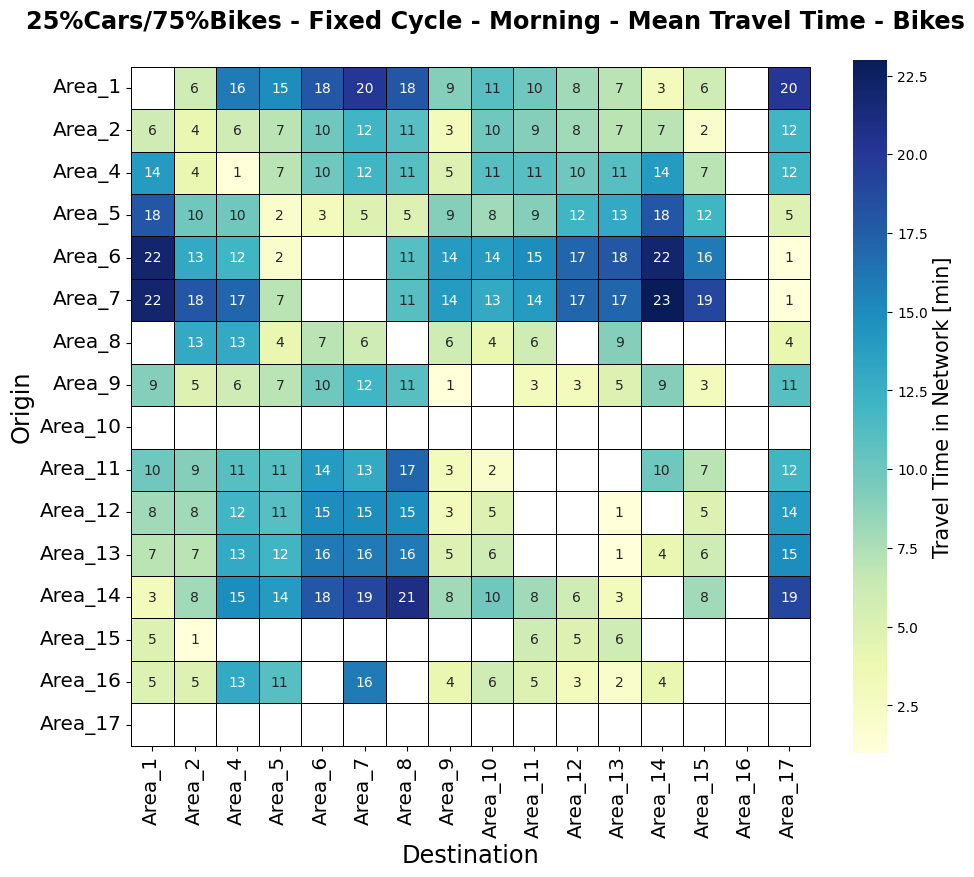

In [21]:
fig, axs = plt.subplots(figsize=(10,10))
#im = axs.imshow(mat)
axs = sns.heatmap(np.around(mat_bike/60,(0)), linewidth=0.5, square=True, cbar_kws={'shrink': 0.75, 'label':'Travel Time in Network [min]'}, annot=np.around(mat_bike/60,(0)), fmt='.0f', cmap='YlGnBu', linecolor='black', clip_on=False, mask=np.around(mat_bike/60,(0)) < 0.5)
axs.set_xticks(np.arange(16)+0.5, labels=names, rotation = 90, ha='center',fontsize='x-large')
axs.set_xlabel('Destination', fontsize='xx-large')
axs.set_yticks(np.arange(16)+0.5, labels=names, rotation = 0, va='center', fontsize='x-large')
axs.set_ylabel('Origin', fontsize='xx-large')
axs.figure.axes[-1].yaxis.label.set_size(15)


plt.tight_layout()
fig.suptitle('25%Cars/75%Bikes - Fixed Cycle - Morning - Mean Travel Time - Bikes', fontsize='xx-large', fontweight='bold', y=0.92)

#plt.savefig('RESULTS/TravelTimes/25MIV_fixed_m_traveltimes_bikes.svg',bbox_inches='tight')
#plt.savefig('RESULTS/TravelTimes/25MIV_fixed_m_traveltimes_bikes.pdf',bbox_inches='tight')

In [22]:
#indexing --> Area_i is at index i-1
#cars
#create empty numpy array 2D 
mat_cars = np.zeros(shape = (17, 17))

cars = grouped_means[grouped_means['vType'] == 'PKW']

for i in range(17):
    if i == 2:
      continue 
    for j in range(17):
        if i == 2:
          continue
        for n in range(len(cars)):
            if (cars.iloc[n,0] == 'Area_{}'.format(i+1)) & (cars.iloc[n,1] == 'Area_{}'.format(j+1)):
                mat_cars[i,j] = cars.iloc[n,4] #min
                
#remove row for area_3
mat_cars = np.delete(mat_cars, (2), axis=0)
mat_cars = np.delete(mat_cars, (2), axis=1)
#save to csv
#csv = pd.DataFrame(data=mat_cars,index=names_from,columns=names_to)
#csv.to_csv('RESULTS/TravelTimes/25MIV_fixed_m_traveltimes_cars.csv')
mat_cars = np.around(mat_cars,(0))

Text(0.5, 0.92, '25%Cars/75%Bikes - Fixed Cycle - Morning - Mean Travel Time - Cars')

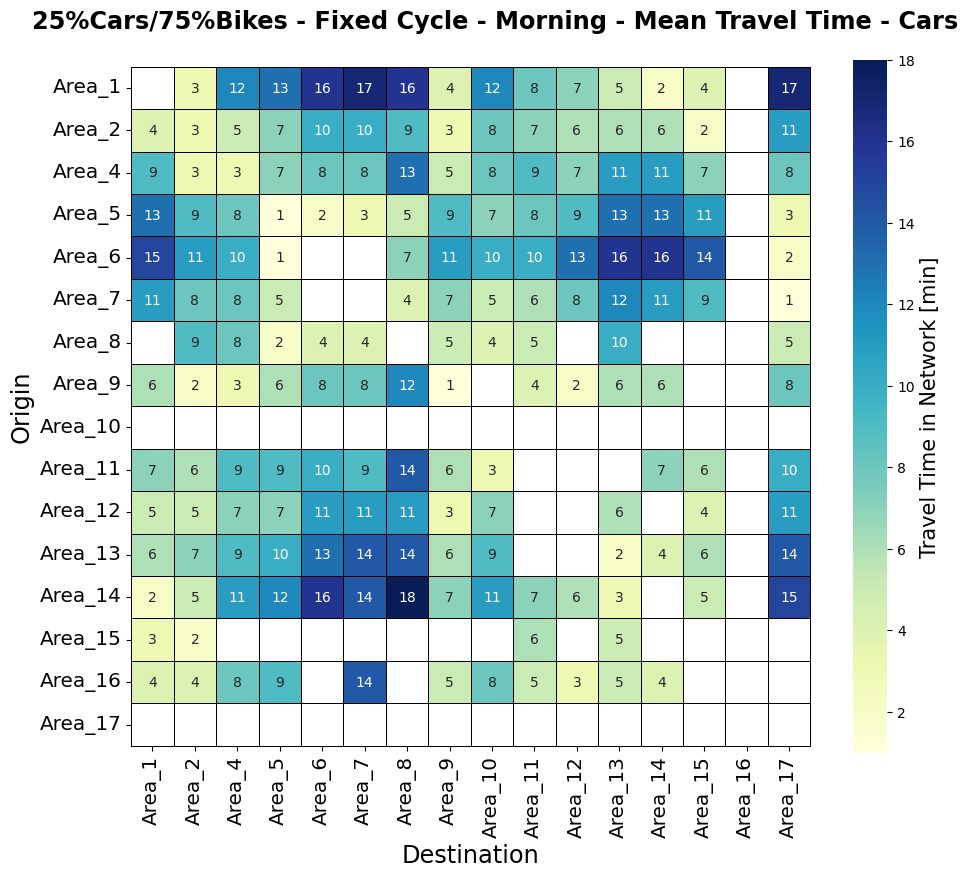

In [23]:
fig, axs = plt.subplots(figsize=(10,10))
#im = axs.imshow(mat)
axs = sns.heatmap(np.around(mat_cars/60,(0)), linewidth=0.5, square=True, cbar_kws={'shrink': 0.75, 'label':'Travel Time in Network [min]'}, annot=np.around(mat_cars/60,(0)), fmt='.0f', cmap='YlGnBu', linecolor='black', clip_on=False, mask=mat_cars < 1)
axs.set_xticks(np.arange(16)+0.5, labels=names, rotation = 90, ha='center',fontsize='x-large')
axs.set_xlabel('Destination', fontsize='xx-large')
axs.set_yticks(np.arange(16)+0.5, labels=names, rotation = 0, va='center', fontsize='x-large')
axs.set_ylabel('Origin', fontsize='xx-large')
axs.figure.axes[-1].yaxis.label.set_size(15)


plt.tight_layout()
fig.suptitle('25%Cars/75%Bikes - Fixed Cycle - Morning - Mean Travel Time - Cars', fontsize='xx-large', fontweight='bold', y=0.92)

#plt.savefig('RESULTS/TravelTimes/25MIV_fixed_m_traveltimes_cars.svg',bbox_inches='tight')
#plt.savefig('RESULTS/TravelTimes/25MIV_fixed_m_traveltimes_cars.pdf',bbox_inches='tight')